In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/global_cancer_patients_2015_2024.csv')

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
5,PT0000005,22,Male,Germany,2018,9.5,6.4,3.3,3.9,5.1,Cervical,Stage IV,33468.99,9.5,5.98
6,PT0000006,41,Male,Canada,2021,5.1,8.2,0.3,3.7,2.1,Cervical,Stage 0,9790.83,1.0,5.05
7,PT0000007,72,Female,Canada,2018,6.0,8.2,6.4,0.6,8.5,Prostate,Stage I,17161.40,6.2,6.02
8,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36
9,PT0000009,49,Female,Canada,2016,8.1,0.8,7.8,5.2,9.3,Prostate,Stage II,56133.45,5.7,5.76


In [1]:
#Verifica se há valores ausentes
df.isnull().sum()
#Remove os valores ausentes
df = df.dropna()
#Remove os valores duplicados
df.duplicated().sum()

#Converte os valores por inteiros
df['Age'] = df['Age'].astype(int)
df['Survival_Years'] = df['Survival_Years'].astype(float)

NameError: name 'df' is not defined

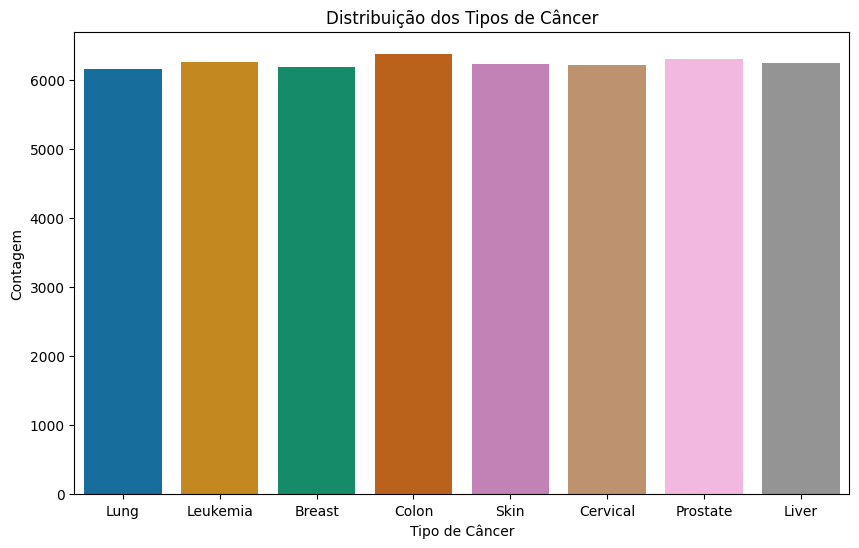

In [9]:
# Distribuião dos tipos de cancer
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cancer_Type', palette='colorblind')
plt.title('Distribuição dos Tipos de Câncer')
plt.xlabel('Tipo de Câncer')
plt.ylabel('Contagem')
plt.show()

Text(0, 0.5, 'Contagem')

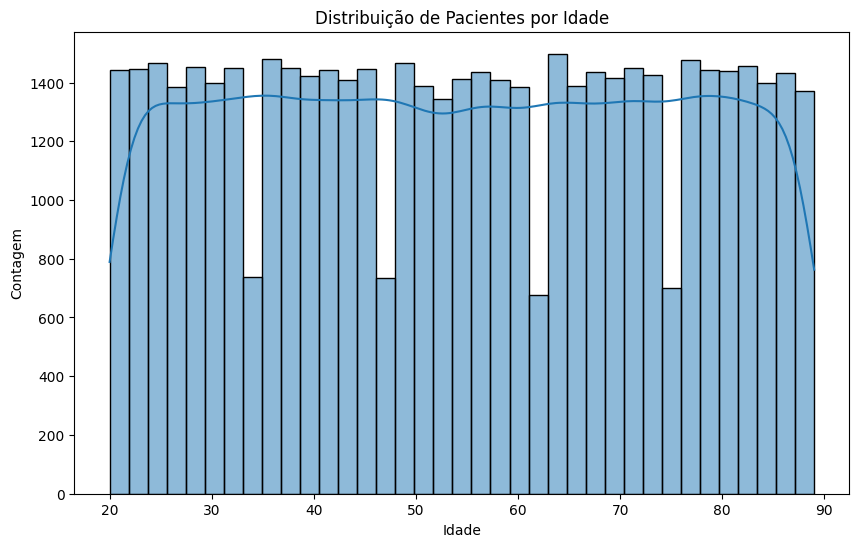

In [12]:
# Distribuião de pacientes por Idade
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', palette='colorblind', kde=True)
plt.title('Distribuição de Pacientes por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

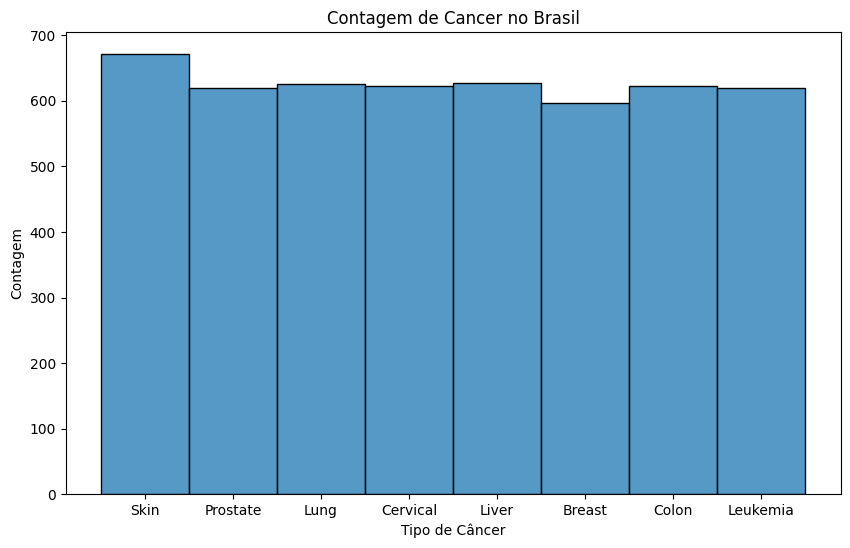

In [15]:
# Contagem de Cancer no Brasil
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Country_Region'] == 'Brazil'], x='Cancer_Type', palette='colorblind')
plt.title('Contagem de Cancer no Brasil')
plt.xlabel('Tipo de Câncer')
plt.ylabel('Contagem')
plt.show()

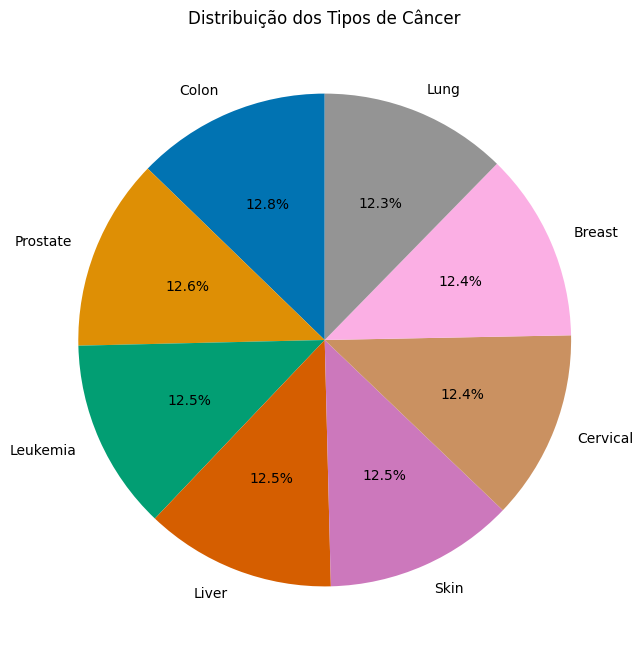

In [17]:
# Grafico Pizza
plt.figure(figsize=(8, 8))
plt.pie(df['Cancer_Type'].value_counts(), labels=df['Cancer_Type'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Distribuição dos Tipos de Câncer')
plt.show()

# Limpeza e codificação

In [18]:
from os import XATTR_CREATE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Limpeza Coluna de nomes
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Limpeza de valores ausentes
df.dropna(inplace=True)

# Define alvo e recursos
target = 'cancer_type'
X = df.drop(target, axis=1)
y = df[target]

# Identificar característica categórica e numérica
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Codifique recursos categóricos usando OneHotEncoder
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Divisão de teste de trem
X-train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Codificação
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)



Hipoteses em relação ao Brasil

* O cancer está aumentando entre jovens e aultos entre 20 a 35 anos;
* O cancer de pele é mais comum entre os homens do que em mulheres;
* A taxa de Anos de sobrevivência de cancer de pulmão é maior que de cancer de pele;
* As mulheres possuem maiores estagios de cancer em relação aos homens;
* Fatores de riscos como hipertensao e alcool influencia nos canceres e é maior em quem tem cancer de pulmão



# Hipotese 1: O cancer está aumentando entre jovens e adultos entre 20 a 30 anos

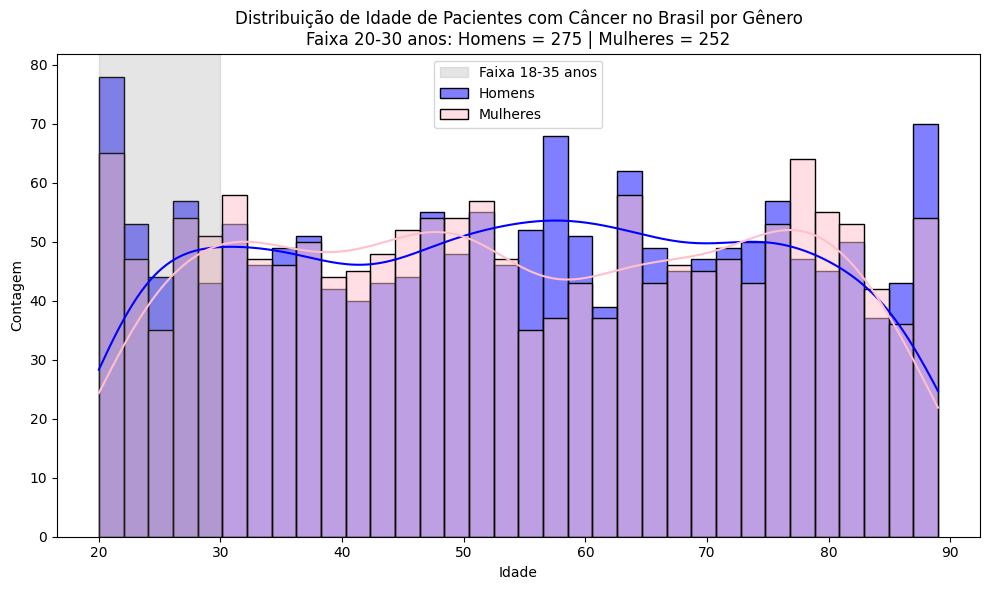

In [96]:
# Filtrar dados para o Brasil e separar por gênero
men_data = df[(df['Country_Region'] == 'Brazil') & (df['Gender'] == 'Male')]['Age']
women_data = df[(df['Country_Region'] == 'Brazil') & (df['Gender'] == 'Female')]['Age']

# Contar casos entre 20 e 35 anos
men_20_30 = ((men_data >= 20) & (men_data <= 30)).sum()
women_20_30 = ((women_data >= 20) & (women_data <= 30)).sum()

# Criar o gráfico de histograma
plt.figure(figsize=(10, 6))
sns.histplot(men_data, label='Homens', color='blue', kde=True, binwidth=2)
sns.histplot(women_data, label='Mulheres', color='pink', kde=True, binwidth=2)

# Destacar a faixa etária de 20 a 30 anos com uma faixa sombreada
plt.axvspan(20, 30, color='gray', alpha=0.2, label='Faixa 18-35 anos')

# Título com os dados quantitativos
plt.title(f'Distribuição de Idade de Pacientes com Câncer no Brasil por Gênero\n'
          f'Faixa 20-30 anos: Homens = {men_20_30} | Mulheres = {women_20_30}')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend()
plt.tight_layout()
plt.show()


# Conclusão da Hipotese 1

*   O gráfico mostra um crescimento de canceres entre jovens e adultos de 20 a 30 anos




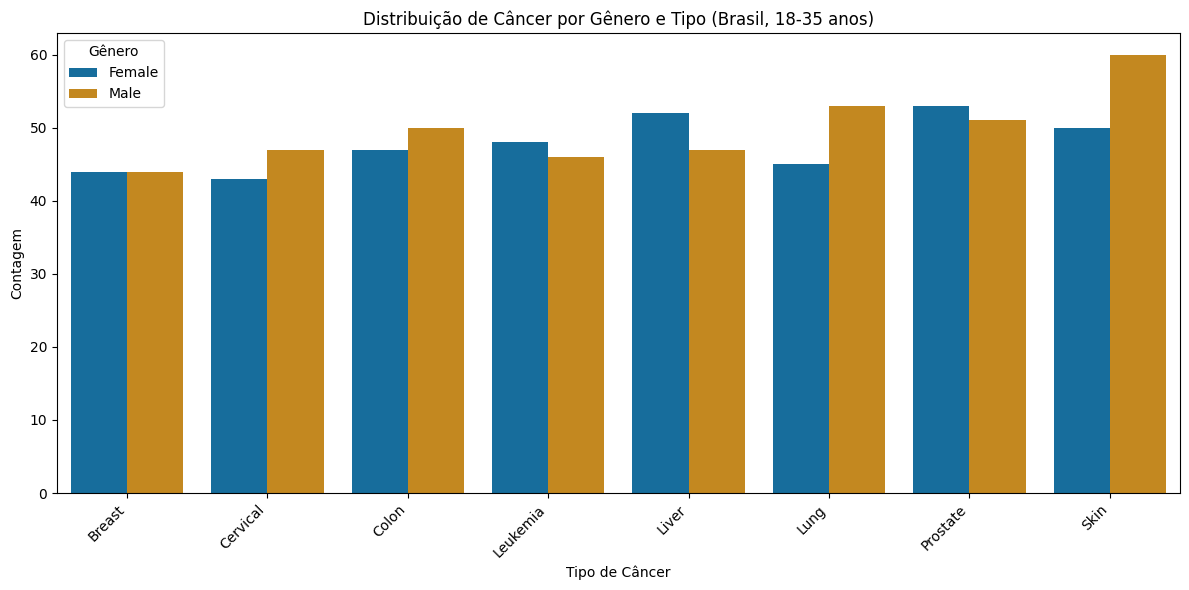

In [83]:
# Filtrar dados para Brasil, idade entre 18 e 35, e homens e mulheres
filtered_df = df[
    (df['Country_Region'] == 'Brazil') &
    (df['Age'] >= 18) &
    (df['Age'] <= 35) &
    (df['Gender'].isin(['Male', 'Female']))
]

# Agrupar por gênero e tipo de câncer, contar as ocorrências
cancer_counts = filtered_df.groupby(['Gender', 'Cancer_Type'])['Age'].count().reset_index()

# Renomear a coluna 'Age' para 'Count'
cancer_counts.rename(columns={'Age': 'Count'}, inplace=True)

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancer_Type', y='Count', hue='Gender', data=cancer_counts, palette='colorblind')
plt.title('Distribuição de Câncer por Gênero e Tipo (Brasil, 18-35 anos)')
plt.xlabel('Tipo de Câncer')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Gênero')
plt.show()

# Hipotese 2: O cancer de pele é mais comum entre os homens do que em mulheres

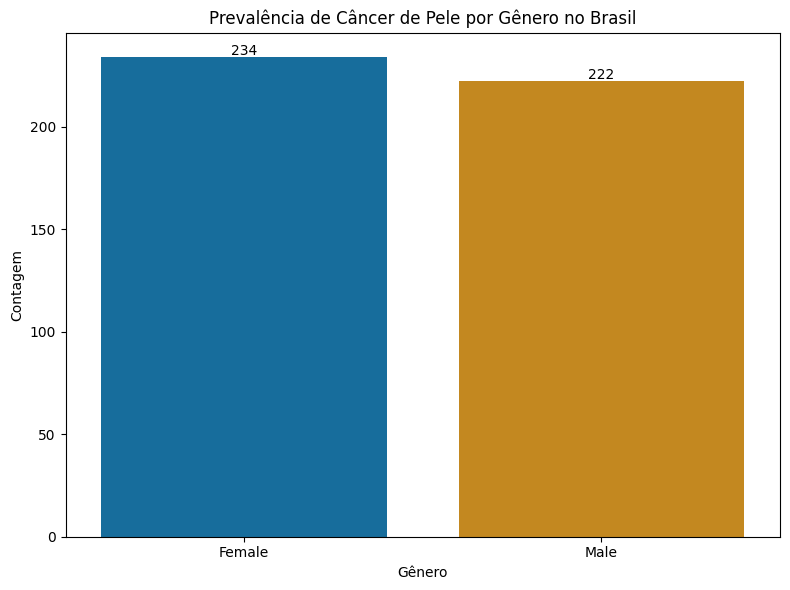

In [84]:
# Filtrar dados para câncer de pele no Brasil
skin_cancer_brazil = df[(df['Cancer_Type'] == 'Skin') & (df['Country_Region'] == 'Brazil')]


# Filtrar os dados, excluindo a categoria 'Other'
filtered_data = skin_cancer_brazil[skin_cancer_brazil['Gender'] != 'Other']

# Criar o gráfico
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=filtered_data, hue='Gender', palette='colorblind')
plt.title('Prevalência de Câncer de Pele por Gênero no Brasil')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Adicionar os números em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{int(height)}', ha="center")

plt.tight_layout()
plt.show()



Conclusão da Hipotese 2:

*   O cance de pele é mais comum em mulheres
*   Hipotese nula



Hipotese 3: A taxa de Anos de sobrevivência de cancer de pulmão é maior que de cancer de pele

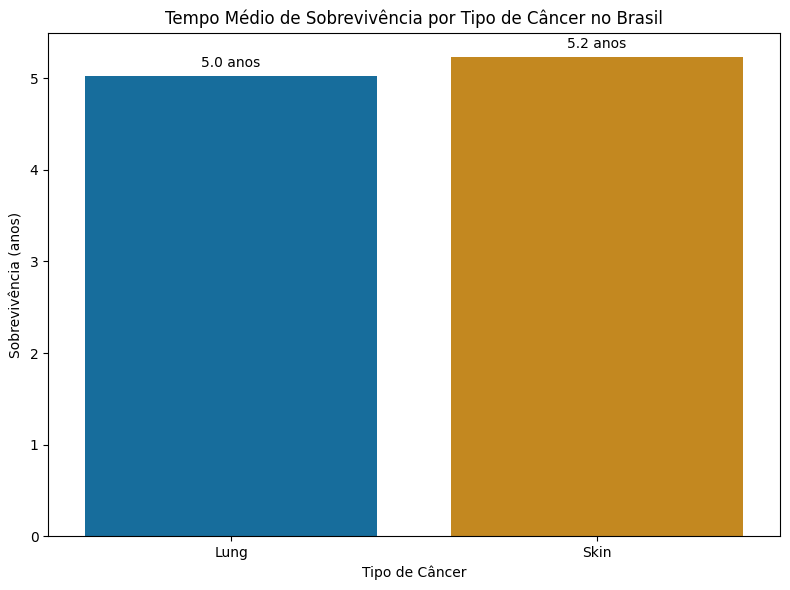

In [93]:
# Filtrar apenas os dados do Brasil e os tipos de câncer desejados
df_brasil = df[(df['Country_Region'] == 'Brazil') & (df['Cancer_Type'].isin(['Lung', 'Skin']))]

# Calcular o tempo médio de sobrevivência por tipo de câncer
survival_rates = df_brasil.groupby('Cancer_Type')['Survival_Years'].mean().reset_index()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=survival_rates, x='Cancer_Type', y='Survival_Years', palette='colorblind')

# Adicionar valores em cima das barras
for index, row in survival_rates.iterrows():
    plt.text(index, row['Survival_Years'] + 0.1, f"{row['Survival_Years']:.1f} anos", ha='center')

plt.title('Tempo Médio de Sobrevivência por Tipo de Câncer no Brasil')
plt.ylabel('Sobrevivência (anos)')
plt.xlabel('Tipo de Câncer')
plt.tight_layout()
plt.show()



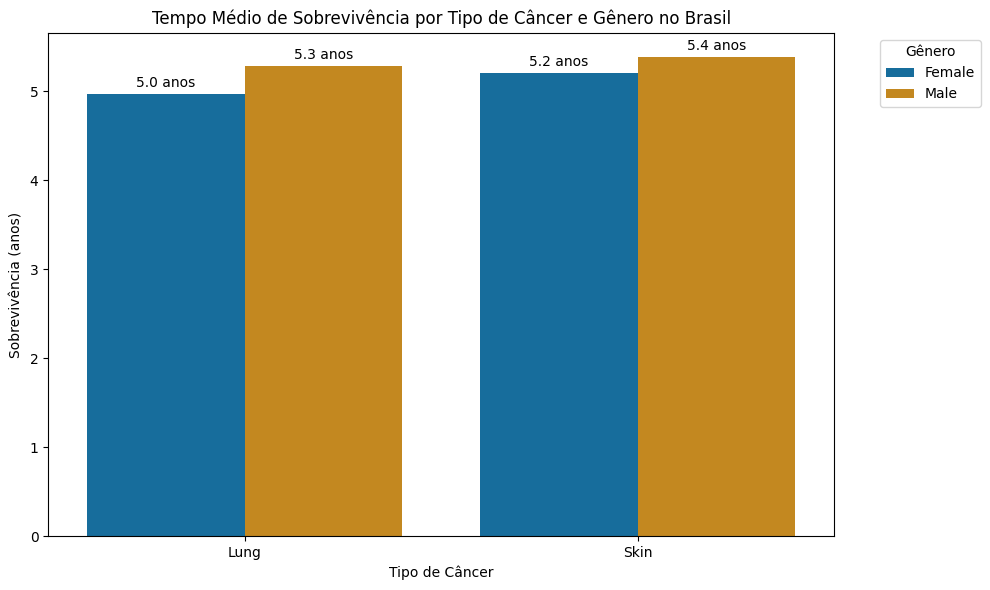

In [92]:
# Filtrar dados para o Brasil, tipos de câncer desejados e excluir o gênero "Other"
df_brasil = df[
    (df['Country_Region'] == 'Brazil') &
    (df['Cancer_Type'].isin(['Lung', 'Skin'])) &
    (df['Gender'] != 'Other')
]

# Agrupar por tipo de câncer e gênero, e calcular média de sobrevivência
survival_by_gender = df_brasil.groupby(['Cancer_Type', 'Gender'])['Survival_Years'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=survival_by_gender,
    x='Cancer_Type',
    y='Survival_Years',
    hue='Gender',
    palette='colorblind'
)

# Adicionar valores em cima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f anos', padding=3)

# Ajustar título e rótulos
plt.title('Tempo Médio de Sobrevivência por Tipo de Câncer e Gênero no Brasil')
plt.ylabel('Sobrevivência (anos)')
plt.xlabel('Tipo de Câncer')

# Mover a legenda para fora do gráfico
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout para não cortar nada
plt.tight_layout()
plt.show()


# Conclusão:

*   O tempo médio de Sobrevivência de câncer de pulmão é menor que de câncer de pele no geral;
*   Em homens e mulheres, o tempo médio de sobrevivência de câncer de pulmao é maior que de câncer de pele;



# Hipotese 4: As mulheres possuem maiores estagios de cancer em relação aos homens

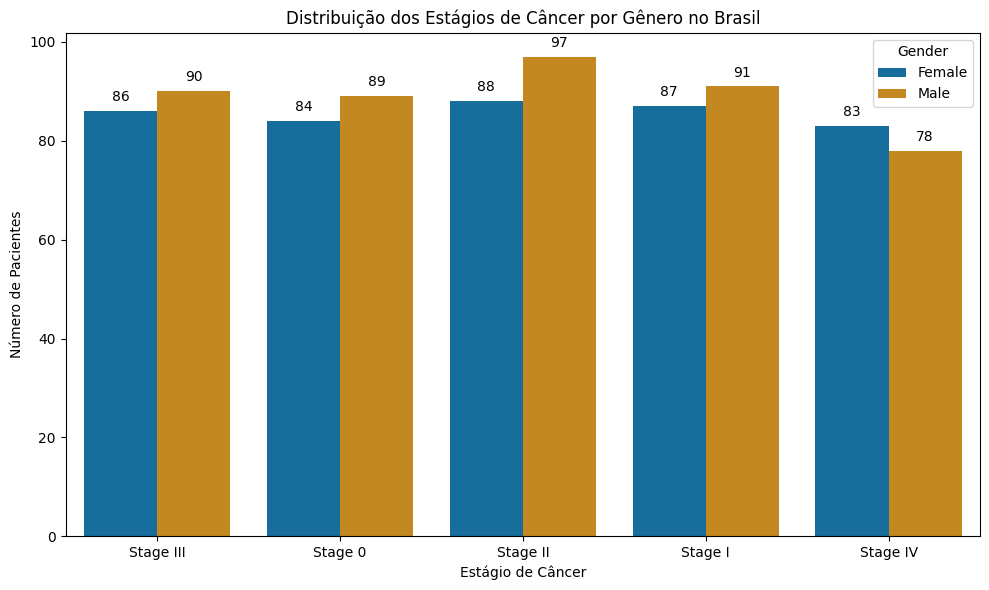

In [91]:
# Filtrar dados para o Brasil, tipos de câncer desejados, e excluir o gênero "Other"
df_brasil = df[
    (df['Country_Region'] == 'Brazil') &
    (df['Cancer_Type'].isin(['Lung', 'Skin'])) &
    (df['Gender'] != 'Other')
]

# Criar o gráfico de barras (contagem dos estágios por gênero)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_brasil, x='Cancer_Stage', hue='Gender', palette='colorblind')

# Adicionar os números sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5)

# Ajustar título e rótulos
plt.title('Distribuição dos Estágios de Câncer por Gênero no Brasil')
plt.ylabel('Número de Pacientes')
plt.xlabel('Estágio de Câncer')

# Ajustar layout
plt.tight_layout()
plt.show()

# Conclusão

*   Entre os estágios 0 a III, há mais mulheres que homens
*   Existe uma maior taxa no estágio IV em homens



# Hipotese 5 : Fatores de riscos como alcool e tabagismo inflencia nos canceres de pele e pulmão e é maior em quem tem cancer de pulmão

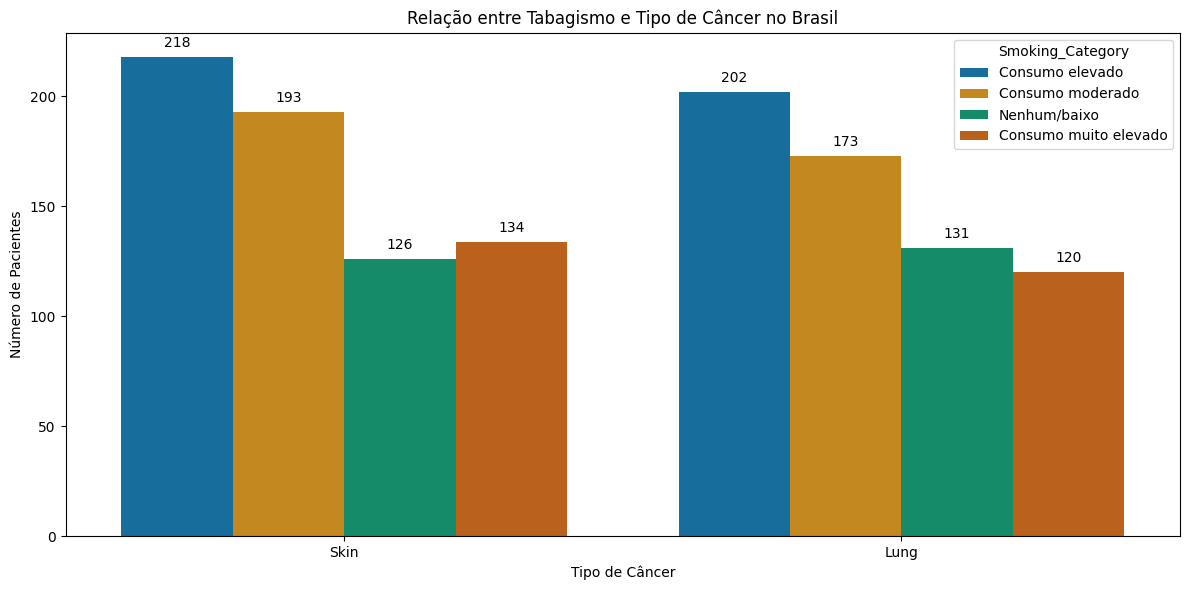

In [108]:
# Filtrar dados para o Brasil, tipos de câncer desejados
df_brasil = df[(df['Country_Region'] == 'Brazil') & df['Cancer_Type'].isin(['Lung', 'Skin'])]

# Categorizar os dados de tabagismo
def categorize_smoking(smoking_score):
    if smoking_score <= 2:
        return 'Nenhum/baixo'
    elif smoking_score <= 5:
        return 'Consumo moderado'
    elif smoking_score <= 8:
        return 'Consumo elevado'
    else:
        return 'Consumo muito elevado'

# Aplicar a categorização no dataframe para tabagismo
df_brasil['Smoking_Category'] = df_brasil['Smoking'].apply(categorize_smoking)

# GRÁFICO 1: Relação entre Tabagismo e Tipo de Câncer

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_brasil, x='Cancer_Type', hue='Smoking_Category', palette='colorblind')
plt.title('Relação entre Tabagismo e Tipo de Câncer no Brasil')
plt.xlabel('Tipo de Câncer')
plt.ylabel('Número de Pacientes')

# Adicionar números sobre as barras para tabagismo
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5)

plt.tight_layout()
plt.show()

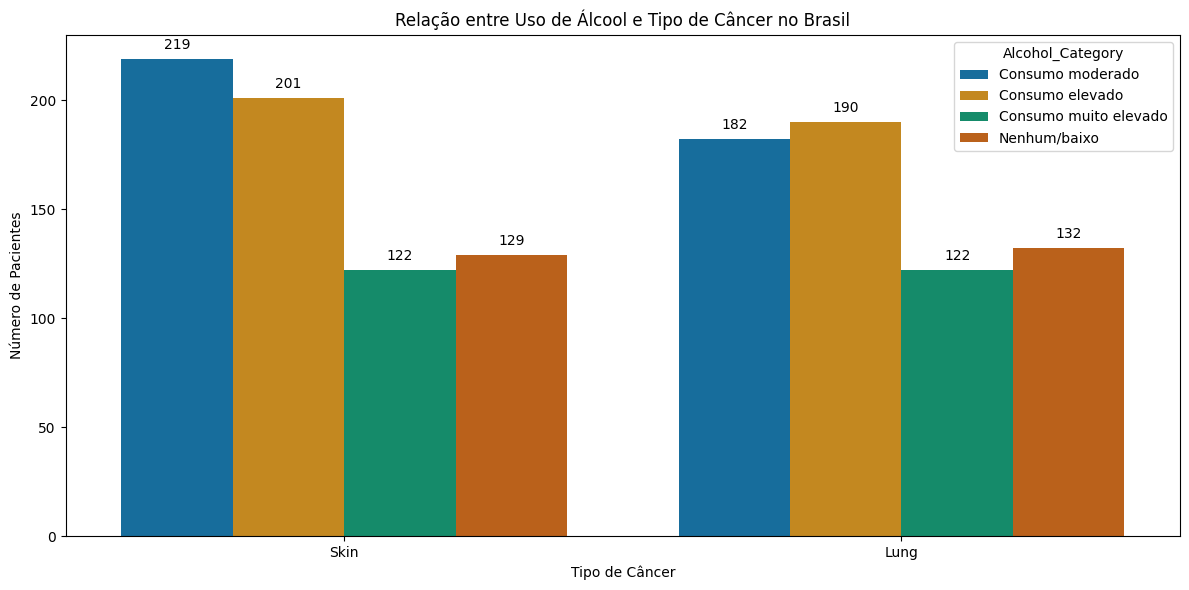

In [105]:
# Categorizar os dados de consumo de álcool
def categorize_alcohol(alcohol_score):
    if alcohol_score <= 2:
        return 'Nenhum/baixo'
    elif alcohol_score <= 5:
        return 'Consumo moderado'
    elif alcohol_score <= 8:
        return 'Consumo elevado'
    else:
        return 'Consumo muito elevado'

# Aplicar a categorização no dataframe para álcool
df_brasil['Alcohol_Category'] = df_brasil['Alcohol_Use'].apply(categorize_alcohol)

# GRÁFICO 2: Relação entre Uso de Álcool e Tipo de Câncer

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_brasil, x='Cancer_Type', hue='Alcohol_Category', palette='colorblind')
plt.title('Relação entre Uso de Álcool e Tipo de Câncer no Brasil')
plt.xlabel('Tipo de Câncer')
plt.ylabel('Número de Pacientes')

# Adicionar números sobre as barras para álcool
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5)

plt.tight_layout()
plt.show()